In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import nltk
nltk.download('stopwords')
import re,string,unicodedata
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split


/Users/Spencer/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/Spencer/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Spencer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# import dataset

In [2]:
true = pd.read_csv("data/True.csv")

In [3]:
fake = pd.read_csv("data/Fake.csv")

In [4]:
# add label
true["is_fake"] = 0
fake["is_fake"] = 1

# data visualization and preprocessing

In [5]:
true.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
len(true)

21417

In [7]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [8]:
true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [9]:
fake.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [10]:
len(fake)

23481

In [11]:
df = pd.concat([true,fake])

In [12]:
len(df)

44898

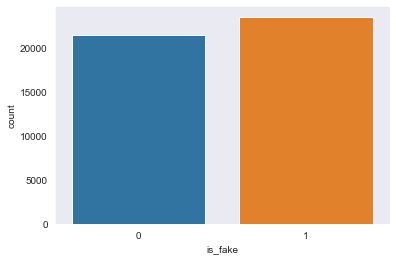

In [13]:
sns.set_style("dark")
sns.countplot(df.is_fake)

We can see it is a balanced dataset.

In [14]:
df.isna().sum() # check nan

title      0
text       0
subject    0
date       0
is_fake    0
dtype: int64

In [15]:
df.title.count() # number of data

44898

In [16]:
df.subject.value_counts() # news subject

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

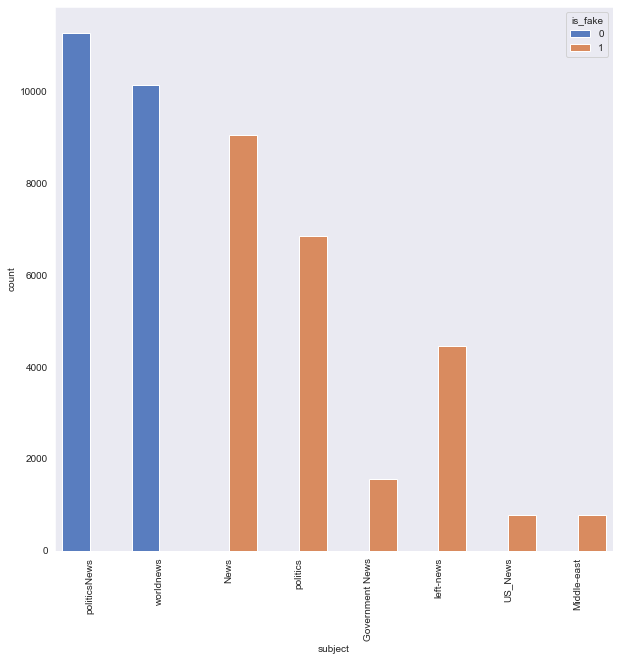

In [17]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "subject", hue = "is_fake" , data = df , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

We can see that the subjects are different for both true news and fake news(catogories), thus, we need to exclude it when we're training.

In [18]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

Stopwords are words that doesn't contain much information of sentence. 
They can be ignored without sarcrificing the meaning of the sentence, e.g. the, he, have, .. etc

In [19]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

### Text cleaning
* Remove html, brackets, stopword, punctuation
* save to txt

In [20]:
def remove_delimiter(text):
    text = text.replace('\n', '')
    return text

def remove_separator(text):
    text = text.replace('\r', '')
    return text

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = text.strip()
    text = remove_delimiter(text)
    text = remove_separator(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [21]:
#Apply function on review column
df['text'] = df['text'].apply(denoise_text)

In [22]:
df.head()

,text,is_fake
0,WASHINGTON (Reuters) head conservative Republi...,0
1,WASHINGTON (Reuters) Transgender people allowe...,0
2,WASHINGTON (Reuters) special counsel investiga...,0
3,WASHINGTON (Reuters) Trump campaign adviser Ge...,0
4,SEATTLE/WASHINGTON (Reuters) President Donald ...,0


In [30]:
df = df.sample(100)

In [31]:
df

,text,is_fake
9547,(Reuters) Transgender students cheered Obama a...,0
16268,“LITTLE” MARCO RUBIO GRILLS Trump’s Secretary ...,1
15464,Last checked harvesting selling body parts Ame...,1
10620,NEW YORK (Reuters) Warren Buffett bemoaned “ne...,0
7000,BEIJING (Reuters) China said Wednesday wanted ...,0
...,...,...
5861,WASHINGTON (Reuters) Pentagon creating list Ir...,0
8711,Self-proclaimed fiscal-conservative Tim Allen ...,1
18402,WASHINGTON (Reuters) U.S. President Donald Tru...,0
20400,"Hysterical! always, conservative comedian Stev...",1


### Word cloud for TRUE news
* is_fake == 0 
* A word cloud is a popular visualization of words typically associated with Internet keywords and text data. They are most commonly used to highlight popular or trending terms based on frequency of use and prominence. A word cloud is a beautiful, informative image that communicates much in a single glance.

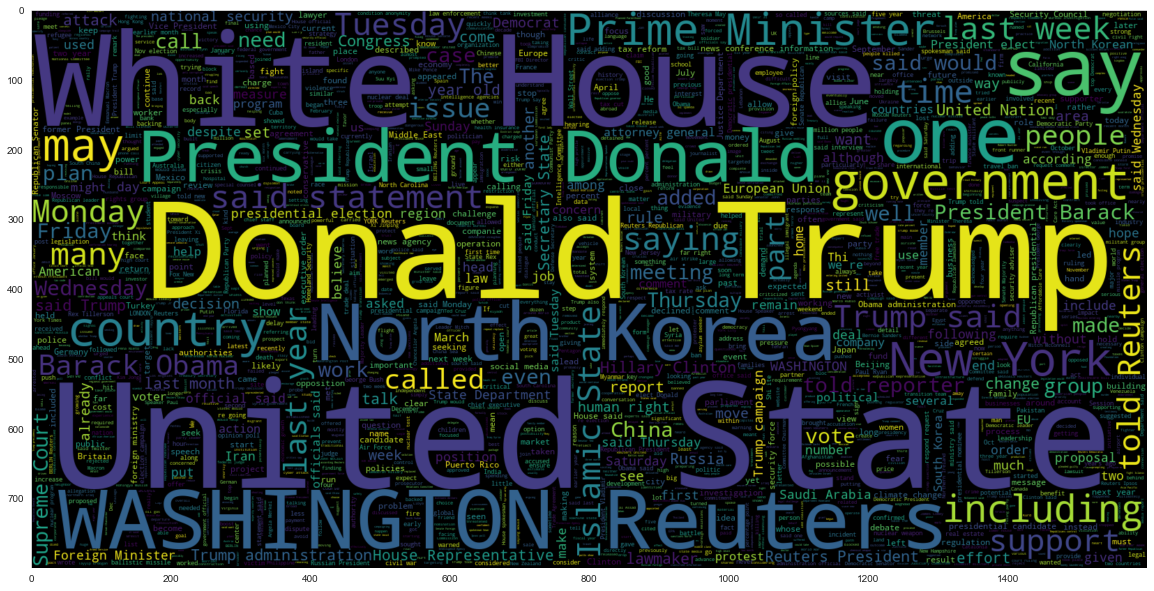

In [59]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.is_fake == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### Word cloud for FAKE news
* is_fake == 1 

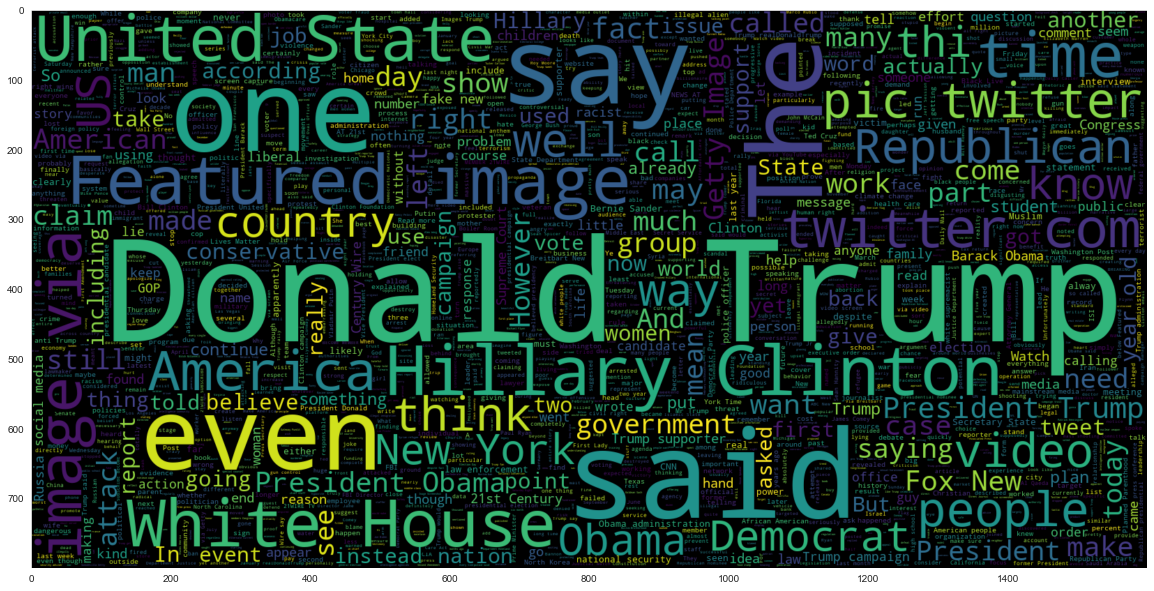

In [60]:
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.is_fake == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Splitting the data into 2 parts - training and testing data

In [32]:
df_train, df_test  = train_test_split(df, test_size = 0.2 ) # shuffle default = True

In [33]:
print("Size of training set: {}".format(len(df_train)))
print("Size of testing set: {}".format(len(df_test)))

Size of training set: 80
Size of testing set: 20


In [34]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [35]:
len(df_train), len(df_test)

(80, 20)

In [36]:
def df_to_txt(df, out_file_path, text_column = "text", label_column = "is_fake"):
    """
    using fixtures to test
    """
    f = open(out_file_path, "w")
    for ix, row in df.iterrows():
        text = row[text_column]
        label = str(row[label_column])
        f.write(text)
        f.write('\n')
        f.write(label)
        f.write('\n')
    f.close()
    print ("writing txt finished")

In [37]:
df_to_txt(df_train, 'data/train.txt', text_column = "text", label_column = "is_fake")


writing txt finished


In [38]:
df_to_txt(df_test, 'data/test.txt', text_column = "text", label_column = "is_fake")

writing txt finished


# Training Part

In [67]:
#from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from pytorch_pretrained_bert import BertModel
from torch.utils.data import Dataset
import pandas as pd
import logging
import argparse
import math
import os
from time import strftime, localtime
import random
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, random_split

### Tokenize for Bert

In [89]:
from pytorch_pretrained_bert import BertTokenizer
import numpy as np


class Tokenizer4Bert:
    def __init__(self, max_seq_len, pretrained_bert_name , max_num_chunks ):
        # Load pretrained model/tokenizer
        self.tokenizer = BertTokenizer.from_pretrained(pretrained_bert_name)
        self.max_seq_len = max_seq_len
        self.max_num_chunks = max_num_chunks

    def long_text_to_chunks(self, text):
        """return an array with shape of [30, max_seq_len], and the element is the token representation of the BERT"""
        import numpy as np
        ls_of_tokens = self.tokenizer.tokenize(text)
        #print('ls of tokens: {},len:{}'.format(ls_of_tokens, len(ls_of_tokens)))
        n = len(ls_of_tokens) // self.max_seq_len
        #print('n: {} '.format(n))
        res = []
        for i in range(self.max_num_chunks):
            if i < n:
                sub_ls_of_tokens = ls_of_tokens[i*self.max_seq_len:i*self.max_seq_len + self.max_seq_len]
            elif i == n:
                tmp_len = len(ls_of_tokens[i*self.max_seq_len:])
                sub_ls_of_tokens = ls_of_tokens[i*self.max_seq_len:]+['[PAD]']*(self.max_seq_len-tmp_len)
            else:
                sub_ls_of_tokens = ['[PAD]']*self.max_seq_len
            # convert ls of toens to sequence of ids
            sub_ls_of_tokens = self.tokenizer.convert_tokens_to_ids(sub_ls_of_tokens)
            res.append(sub_ls_of_tokens)
        return np.array(res)

    def text_to_sequence(self, text, reverse=False, padding='post', truncating='post'):
        sequence = self.tokenizer.convert_tokens_to_ids(self.tokenizer.tokenize(text))
        print("seq: {}, len:{}".format(sequence,len(sequence)))
        if len(sequence) == 0:
            sequence = [0]
            print('seq:{}'.format(sequence))
        if reverse:
            sequence = sequence[::-1]
            print('seq:{}'.format(sequence))

        return self.pad_and_truncate(sequence, self.max_seq_len, padding=padding, truncating=truncating)

    def pad_and_truncate(self, sequence, maxlen, dtype='int64', padding='post', truncating='post', value=0):
        import numpy as np
        x = (np.ones(maxlen) * value).astype(dtype)
        if truncating == 'pre':
            trunc = sequence[-maxlen:]
        else:
            trunc = sequence[:maxlen]
        trunc = np.asarray(trunc, dtype=dtype)
        if padding == 'post':
            x[:len(trunc)] = trunc
        else:
            x[-len(trunc):] = trunc
        return x


In [93]:
class ABSADataset(Dataset):
    def __init__(self, fname, tokenizer):
        fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
        lines = fin.readlines()[:100] # 先看前面50筆 ！！！！！！
        fin.close() 

        all_data = []
        for i in range(0, len(lines), 2):
            text = lines[i].strip()
            polarity = lines[i + 1].strip()
            # single-sentence classification
            #text_raw_bert_indices = tokenizer.text_to_sequence("[CLS] " + text)
            # documentation classification
            text_raw_bert_documents = tokenizer.long_text_to_chunks("[CLS] " + text)
            # label
            polarity = int(polarity)  # range betwee 0 to num_class -1

            data = {
                #'text_raw_bert_indices': text_raw_bert_indices,
                'text_raw_bert_documents': text_raw_bert_documents,
                'polarity': polarity,
            }
            all_data.append(data)

        self.data = all_data

    def get_dataframe(self, tokenizer):
        """
        Conver dataset into DataFrame(Pandas)
        It's only support for bert-based model.
        """
        df = []
        columns_name = []
        for i in range(len(self.data)):
            tmp = []
            for k, v in self.data[i].items():
                try:
                    to_str = " ".join(tokenizer.tokenizer.convert_ids_to_tokens(v))
                    tmp.append(to_str)
                except:
                    if k == 'aspect_in_text':
                        # it's a 1-D tensor wtih shape of (2,), representing the start and end index of the aspect
                        v = v.numpy()  # 1-D tensor
                        #print (v.shape)
                    tmp.append(v)
                if i <= 0:
                    columns_name.append(k)
            df.append(tmp)
        df = pd.DataFrame(df,columns=columns_name)
        return df

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return len(self.data)

### Model's input

In [94]:
max_seq_len = 270
pretrained_bert_name = "bert-base-uncased"
max_num_chunks = 3
train_path = 'data/train.txt'
test_path = 'data/test.txt'
tokenizer = Tokenizer4Bert(max_seq_len, pretrained_bert_name, max_num_chunks)

In [95]:
trainset = ABSADataset(train_path, tokenizer)
testset = ABSADataset(test_path, tokenizer)
print ('number of traning data', len(trainset))
print ('number of testing data', len(testset))

number of traning data 50
number of testing data 50


In [102]:
train_df = trainset.get_dataframe(tokenizer)
test_df = testset.get_dataframe(tokenizer)

In [103]:
train_df

,text_raw_bert_documents,polarity
0,"[[101, 2706, 5936, 5228, 3754, 3537, 2283, 244...",1
1,"[[101, 4068, 1006, 26665, 1007, 7306, 10413, 2...",0
2,"[[101, 6744, 1006, 26665, 1007, 1057, 1012, 10...",0
3,"[[101, 4121, 6545, 8495, 6947, 2342, 2203, 283...",1
4,"[[101, 8037, 6449, 2933, 10797, 3742, 14303, 9...",1
5,"[[101, 2131, 4426, 999, 9587, 11663, 3248, 267...",1
6,"[[101, 6613, 2267, 23875, 2047, 2259, 2103, 26...",1
7,"[[101, 2899, 1006, 26665, 1007, 1057, 1012, 10...",0
8,"[[101, 3951, 5205, 14566, 2703, 3764, 13229, 1...",1
9,"[[101, 4924, 1006, 26665, 1007, 7032, 2111, 27...",0


### Hyper-parameters

In [104]:
# Model Parameters for train
learning_rate = 2e-5
num_epoch = 10
batch_size = 64
log_step = 5
valset_ratio = 0
get_tokenized_result = True

In [105]:
# Model Parameters for predict
# model_name = 'bert_ssc'
pretrained_bert_name = 'bert-base-uncased'
dropout = 0.1
bert_dim = 768
polarities_dim = 2
device = None
state_dict_path = "artifacts/bert_ssc_val_acc"

### Model
* LSTM + Linear Classifier

In [109]:
import torch
import torch.nn as nn
from torch.nn import LSTM


class BERT_DocumentLSTM(nn.Module):
    """Long Documentation classification"""
    def __init__(self, bert, opt):
        super(BERT_DocumentLSTM, self).__init__()
        self.opt = opt
        self.bert = bert
        self.dropout = nn.Dropout(opt.dropout)
        self.lstm = LSTM(input_size = opt.bert_dim, hidden_size = opt.bert_dim, batch_first = True) # [B, max_num_chunks, bert_dim]
        self.dense = nn.Linear(opt.bert_dim, opt.polarities_dim)

    def forward(self, inputs):
        text_bert_indices = inputs[0] # [B, max_num_chunks, max_seq_length]
        # extract bert representation
        lstm_input = [] # [B, max_num_chunk, bert_dim]
        B = text_bert_indices.size()[0]
        for i in range(B):
            document = text_bert_indices[i,:,:]
            _, pooled_output = self.bert(document, output_all_encoded_layers=False) 
            # [max_num_chunk, opt.bert_dim]
            pooled_output = self.dropout(pooled_output)
            lstm_input.append(pooled_output)
        lstm_input = torch.stack(lstm_input)
        # lstm
        _, (h_n, _) = self.lstm(lstm_input) 
        # classifier
        logits = self.dense(h_n[0]) # [B, bert_dim]
        return logits

In [123]:
import torch.nn as nn

# Loss and Optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
bert = BertModel.from_pretrained(pretrained_bert_name)
criterion = nn.CrossEntropyLoss().to(device)
print ("loss",criterion)

class objectview(object):
    def __init__(self, d):
        self.__dict__ = d
        
opt = {
    "device":device,
    "dropout":0.1,
    "hidden_dim":768,
    "bert_dim":768,
    "polarities_dim":2,
    "learning_rate":2e-5,
    "l2reg":0.01,
    "num_epoch":10,
    "batch_size":64,
    "optimizer":torch.optim.Adam,
    "inputs_cols":['text_raw_bert_documents']
}
opt = objectview(opt)

model = BERT_DocumentLSTM(bert,opt)
_params = filter(lambda p: p.requires_grad, model.parameters())
optimizer = opt.optimizer(_params, lr=opt.learning_rate, weight_decay=opt.l2reg)
print ("optimizer", optimizer)

loss CrossEntropyLoss()
optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 2e-05
    weight_decay: 0.01
)


In [124]:
help(model)

Help on BERT_DocumentLSTM in module __main__ object:

class BERT_DocumentLSTM(torch.nn.modules.module.Module)
 |  Long Documentation classification
 |  
 |  Method resolution order:
 |      BERT_DocumentLSTM
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, bert, opt)
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  forward(self, inputs)
 |      Defines the computation performed at every call.
 |      
 |      Should be overridden by all subclasses.
 |      
 |      .. note::
 |          Although the recipe for forward pass needs to be defined within
 |          this function, one should call the :class:`Module` instance afterwards
 |          instead of this since the former takes care of running the
 |          registered hooks while the latter silently ignores them.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from

### Training precedure

In [125]:
from torch.utils.data import DataLoader, random_split
valset = testset 
train_data_loader = DataLoader(dataset=trainset, batch_size=opt.batch_size, shuffle=True)
test_data_loader = DataLoader(dataset=testset, batch_size=opt.batch_size, shuffle=False)
val_data_loader = DataLoader(dataset=valset, batch_size=opt.batch_size, shuffle=False)

In [126]:
trainset

In [ ]:
max_val_acc = 0
max_val_f1 = 0
global_step = 0
path = None
for epoch in range(opt.num_epoch):
    print('>' * 100)
    print('epoch: {}'.format(epoch))
    n_correct, n_total, loss_total = 0, 0, 0
    # switch model to training mode
    model.train()
    for i_batch, sample_batched in enumerate(train_data_loader):
        if i_batch <= 0 :
            print (type(sample_batched))
        global_step += 1
        # clear gradient accumulators
        optimizer.zero_grad()

        inputs = [sample_batched[col].to(opt.device) for col in opt.inputs_cols]
        if i_batch <= 0 :
            print ("=" * 100)
            print ("inputs")
            print (len(inputs))
            print (inputs)
        outputs = model(inputs)
        if i_batch <= 0 :
            print ("=" * 100)
            print ("outputs")
            print (len(outputs))
            print (outputs)

        targets = sample_batched['polarity'].to(self.opt.device)

        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        n_correct += (torch.argmax(outputs, -1) == targets).sum().item()
        n_total += len(outputs)
        loss_total += loss.item() * len(outputs)
        if global_step % self.opt.log_step == 0:
            train_acc = n_correct / n_total
            train_loss = loss_total / n_total
            logger.info('loss: {:.4f}, acc: {:.4f}'.format(train_loss, train_acc))

    val_acc, val_f1 = self._evaluate_acc_f1(val_data_loader)
    logger.info('> val_acc: {:.4f}, val_f1: {:.4f}'.format(val_acc, val_f1))
    if val_acc > max_val_acc:
        max_val_acc = val_acc
        if not os.path.exists('state_dict'):
            os.mkdir('state_dict')
        path = 'state_dict/{0}_{1}_val_acc{2}'.format(self.opt.model_name, self.opt.dataset, round(val_acc, 4))
        torch.save(self.model.state_dict(), path)
        logger.info('>> saved: {}'.format(path))
    if val_f1 > max_val_f1:
        max_val_f1 = val_f1

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
epoch: 0
<class 'dict'>
inputs
1
[tensor([[[  101, 15335,  1013,  ...,  1012,  1524,  4238],
         [ 3271,  3443,  4247,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]],

        [[  101,  1006, 26665,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]],

        [[  101,  3731,  1006,  ...,  5392,  1010,  2662],
         [ 1010,  7756,  2212,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]],

        ...,

        [[  101, 17186,  3953,  ...,  2419,  4001,  4188],
         [ 5136,  3537,  2343,  ...,  9023,  2457,  3648],
         [ 1010, 24116,  2098,  ...,     0,     0,     0]],

        [[  101,  2899,  1006,  ..., 20778,  8513,  2121],
         [ 2056, 10552,  8398,  ...,     0,     0,     0],
         [    0, 

# ----------------------------------------------------------------

In [150]:
# reference from kaggle (BERT): Freeze all the weights

# # Freeze the pre trained parameters
# for param in model.parameters():
#     param.requires_grad = False

# # Add three new layers at the end of the network
# model.classifier = nn.Sequential(
#     nn.Linear(768, 256),
#     nn.ReLU(),
#     nn.Linear(256, 64),
#     nn.ReLU(),
#     nn.Linear(64, 2)
# )

In [151]:
# criterion = nn.CrossEntropyLoss().to(device)
# optimizer = optim.Adam(model.classifier.parameters(), lr = 0.01)

In [152]:
# def preprocess_text(text):
#     parts = []

#     text_len = len(text.split(' '))
#     delta = 300
#     max_parts = 5
#     nb_cuts = int(text_len / delta)
#     nb_cuts = min(nb_cuts, max_parts)
    
    
#     for i in range(nb_cuts + 1):
#         text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
#         parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

#     return parts

In [114]:
# print_every = 300

# total_loss = 0
# all_losses = []

# CUDA_LAUNCH_BLOCKING=1

# model.train()

In [117]:
# for idx, row in df_train.head(600).iterrows():
#     text_parts = preprocess_text(str(row['text']))
#     label = torch.tensor([row['is_fake']]).to(device)

#     optimizer.zero_grad()

#     overall_output = torch.zeros((1, 2)).float().to(device)
#     for part in text_parts:
#         if len(part) > 0:
#             try:
#                 input = part.reshape(-1)[:512].reshape(1, -1)
# #                 print(input.shape)
#                 overall_output += model(input, labels=label)[0].float().to(device)
#             except Exception as e:
#                 print(str(e))

# #     overall_output /= len(text_parts)
# #     overall_output = F.softmax(overall_output, dim=-1)

# #     if label == 0:
# #         label = torch.tensor([1.0, 0.0]).float().to(device)
# #     elif label == 1:
# #         label = torch.tensor([0.0, 1.0]).float().to(device)

#     print(overall_output, label)

#     loss = criterion(overall_output, label)
#     total_loss += loss.item()
    
#     loss.backward()
#     optimizer.step()
#     print (loss)
#     if idx % print_every == 0 and idx > 0:
#         average_loss = total_loss / print_every
#         print("{}/{}. Average loss: {}".format(idx, len(df_train), average_loss))
#         all_losses.append(average_loss)
#         total_loss = 0